## Importing relevant python libraries

In [146]:
from timeit import default_timer
import datetime
from pandas.io import sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [119]:
start = default_timer()
st= default_timer()

## Loading CSV files scraped from IMDB page of Twitter and IMDB channel of Youtube

Brief description of these files

Movies- contains data related to movie name, genres and year of release

Ratings dataset- This data is picked from existing Grouplens database has has movie ratings from 0-5 scale

Tag- contains all the real time hashtags extracted from IMDB page of twitter 

Tweet_ratings- conatains all the ratings of movies posted on IMDB page of twitter

Youtube- contains raw data from IMDB channel of Twitter

In [120]:
movies=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\movies.csv''')
ratings=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\ratings.csv''')
tag=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\tag.csv''')
tweet_ratings=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\tweet_ratings.csv''')
raw_tweets=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\raw_tweets.csv''',encoding = "ISO-8859-1")
KimKardashianTweets=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\KimKardashianTweets.csv''')
AdamSavageTweets=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\AdamSavageTweets.csv''')
youtube=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\convertcsv.csv''')

## Data Cleaning

Data Cleansing or data scrubbing is the process of identifying and correcting inaccurate data from a data set. data cleansing is the process of maintaining consistent and accurate (clean) customer database through identification & removal of inaccurate (dirty) data. Here, inaccurate data stands for any data that is incorrect, incomplete, out-of-date, or wrongly formatted.

For our project, we have cleaned the data with aim of DATA NORMALIZATION to follow relational database rules. 

We have,

- checked and deleted null values

- checked and deleted duplicate entries

- transformed datatype into proper format

- check to ensure all fields have single entry



In [5]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [121]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [7]:
tag.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [8]:
tweet_ratings.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,1.303533e+08,1307068,10.0,1522902075
1,3.487794e+08,7043176,8.0,1522901127
2,1.457927e+08,6470762,6.0,1522900426
3,1.104898e+08,6644200,10.0,1522899991
4,2.875989e+07,1584016,7.0,1522899766
5,3.646096e+08,2406566,5.0,1522899076
6,3.122073e+07,5133308,6.0,1522898034
7,4.610554e+09,6684714,8.0,1522898011
8,1.176473e+09,5580390,6.0,1522897970
9,6.958999e+07,5580390,7.0,1522896889


In [10]:
raw_tweets.head(5)

,created_at,favorite_count,favorited,filter_level,lang,retweet_count,retweeted,source,text,truncated,user_created_at,user_followers_count,user_location,user_lang,user_name,user_screen_name,user_time_zone,user_utc_offset,user_friends_count
0,Mon Apr 09 04:09:51 +0000 2018,0.0,False,low,en,0.0,False,"b'<a href=""http://twitter.com/download/iphone""...",b'RT @_Miaya: YALL LETS GO SEE IT AGAIN https:...,False,Sun Mar 18 20:26:50 +0000 2012,562.0,België | Dallas | Denver,fr,b'Shwty J\xc3\xb4',b'asvpxjozy',Central Time (US & Canada),-18000.0,271.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mon Apr 09 04:09:51 +0000 2018,0.0,False,low,en,0.0,False,"b'<a href=""https://about.twitter.com/products/...","b""watched the trailer for pacific rim 2 again ...",True,Sun Sep 30 00:24:59 +0000 2012,1797.0,"Hell, TN USA",en,b'Andrea \xd9\xa9( \xca\x98\xe1\x86\xba\xca\x...,b'missbonekitty',Eastern Time (US & Canada),-14400.0,1191.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Apr 09 04:09:52 +0000 2018,0.0,False,low,en,0.0,False,"b'<a href=""http://twitter.com"" rel=""nofollow"">...",b'RT @WarricrAndKing: \xe2\x9d\x9dToday we are...,False,Sat Mar 10 06:45:10 +0000 2018,264.0,Central City. [#HeroicPlayer],en,b'August Heart.',b'SpeedAndRevenge',NaN,NaN,408.0


In [11]:
KimKardashianTweets.head(6)

,id,userID,date,link,retweet,text,author
0,7.826940e+17,18,Oct-02,/KimKardashian/status/782694393216110592,False,Hey guys! Meet my #KimKardashianGame character...,KimKardashian
1,7.826330e+17,65,Oct-02,/KimKardashian/status/782632831780618240,False,This guy is always in my shot!pic.twitter.com/...,KimKardashian
2,7.825600e+17,65,Oct-02,/KimKardashian/status/782559825205071872,False,Balenciaga. No make up today.pic.twitter.com/l...,KimKardashian
3,7.822610e+17,65,Oct-01,/KimKardashian/status/782260907900567552,False,Kourtney and Kim Take Parispic.twitter.com/VXw...,KimKardashian
4,7.822590e+17,65,Oct-01,/KimKardashian/status/782259209459101697,False,GIVENCHY COUTUREpic.twitter.com/jHxTIuHzzo,KimKardashian
5,7.825360e+17,65,Oct-02,/KimKardashian/status/782535762554290176,False,The Yeezy Show Room in Paris is heaven.,KimKardashian


In [12]:
youtube.head(5)

,kind,etag,id/kind,id/videoId,snippet/publishedAt,snippet/channelId,snippet/title,snippet/description,snippet/thumbnails/default/url,snippet/thumbnails/default/width,snippet/thumbnails/default/height,snippet/thumbnails/medium/url,snippet/thumbnails/medium/width,snippet/thumbnails/medium/height,snippet/thumbnails/high/url,snippet/thumbnails/high/width,snippet/thumbnails/high/height,snippet/channelTitle,snippet/liveBroadcastContent,id/playlistId
0,youtube#searchResult,"""adhdwwnzlC1WiY00i7th8QwqOGQ/vxGX-TW55A0IGg1yA...",youtube#video,rJbafCw9gfY,2018-04-16T17:01:00.000Z,UC_vz6SvmIkYs1_H3Wv2SKlg,9 Things to Know About 'Incredibles 2',Learn more about how animators and creators de...,https://i.ytimg.com/vi/rJbafCw9gfY/default.jpg,120,90,https://i.ytimg.com/vi/rJbafCw9gfY/mqdefault.jpg,320,180,https://i.ytimg.com/vi/rJbafCw9gfY/hqdefault.jpg,480,360,IMDb,none,NaN
1,youtube#searchResult,"""adhdwwnzlC1WiY00i7th8QwqOGQ/N-aGqjl4idbdv1NnA...",youtube#video,Yn5bkPIHgPA,2018-04-16T16:55:18.000Z,UC_vz6SvmIkYs1_H3Wv2SKlg,Hotel Artemis (2018) | NEW TRAILER Starring Jo...,"Set in riot-torn, near-future Los Angeles, 'Ho...",https://i.ytimg.com/vi/Yn5bkPIHgPA/default.jpg,120,90,https://i.ytimg.com/vi/Yn5bkPIHgPA/mqdefault.jpg,320,180,https://i.ytimg.com/vi/Yn5bkPIHgPA/hqdefault.jpg,480,360,IMDb,none,NaN
2,youtube#searchResult,"""adhdwwnzlC1WiY00i7th8QwqOGQ/gaCqholPgU8oMByow...",youtube#video,QmmI7B2_fII,2018-04-14T22:01:27.000Z,UC_vz6SvmIkYs1_H3Wv2SKlg,"""Lost in Space"" 6 degrees of Separation | Cast...",Everyone in Hollywood may be six degrees from ...,https://i.ytimg.com/vi/QmmI7B2_fII/default.jpg,120,90,https://i.ytimg.com/vi/QmmI7B2_fII/mqdefault.jpg,320,180,https://i.ytimg.com/vi/QmmI7B2_fII/hqdefault.jpg,480,360,IMDb,none,NaN
3,youtube#searchResult,"""adhdwwnzlC1WiY00i7th8QwqOGQ/RVkP3ofpHwDLDfz6Z...",youtube#playlist,NaN,2018-04-13T23:31:06.000Z,UC_vz6SvmIkYs1_H3Wv2SKlg,COMING SOON,"Get an exclusive look at cast interviews, trai...",https://i.ytimg.com/vi/XEgt1mYTLqY/default.jpg,120,90,https://i.ytimg.com/vi/XEgt1mYTLqY/mqdefault.jpg,320,180,https://i.ytimg.com/vi/XEgt1mYTLqY/hqdefault.jpg,480,360,IMDb,none,PLRDnnvx-4xZ1W6zkTKNP1tKGebVDhvWJQ
4,youtube#searchResult,"""adhdwwnzlC1WiY00i7th8QwqOGQ/5Jwm0-H6zbaua_7EY...",youtube#video,d6NabuqVas8,2018-04-13T17:01:54.000Z,UC_vz6SvmIkYs1_H3Wv2SKlg,"Lennie James Roles Before ""The Walking Dead"" |...",Veteran British actor Lennie James is perhaps ...,https://i.ytimg.com/vi/d6NabuqVas8/default.jpg,120,90,https://i.ytimg.com/vi/d6NabuqVas8/mqdefault.jpg,320,180,https://i.ytimg.com/vi/d6NabuqVas8/hqdefault.jpg,480,360,IMDb,none,NaN


# Data cleaning and data preparation (Data Normalization)

- Organize and sort the data
- Check for datatypes and convert them in proper format
- Rename column in usable format if needed
- Check for duplicate entry and remove if any
- Check and delete/replace NULL values

### Organize the bit and store in feather format

In [13]:
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)
tag.sort_values(by='userId', inplace=True)
tag.reset_index(inplace=True, drop=True)
tweet_ratings.sort_values(by='Tweet_userID', inplace=True)
tweet_ratings.reset_index(inplace=True, drop=True)
KimKardashianTweets.sort_values(by='id', inplace=True)
KimKardashianTweets.reset_index(inplace=True, drop=True)

## Check for datatypes of all the columns and convert into proper format if needed

In [16]:
print(movies.dtypes)

movieId     int64
title      object
genres     object
dtype: object


## Segregate year from title and create new column

In [17]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)

In [18]:
movies.year.head(10)

0    1995
1    1995
2    1995
3    1995
4    1995
5    1995
6    1995
7    1995
8    1995
9    1995
Name: year, dtype: object

## Change year to datetime format

In [19]:
movies.year = pd.to_datetime(movies.year, format='%Y')

In [20]:
movies.year.head(10)

0   1995-01-01
1   1995-01-01
2   1995-01-01
3   1995-01-01
4   1995-01-01
5   1995-01-01
6   1995-01-01
7   1995-01-01
8   1995-01-01
9   1995-01-01
Name: year, dtype: datetime64[ns]

In [21]:
movies.year = movies.year.dt.year

In [22]:
movies.year.head(10)

# As there are some NaN years, resulting type will be float (decimals)

0    1995.0
1    1995.0
2    1995.0
3    1995.0
4    1995.0
5    1995.0
6    1995.0
7    1995.0
8    1995.0
9    1995.0
Name: year, dtype: float64

In [23]:
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
5,6,Heat (1995),Action|Crime|Thriller,1995.0
6,7,Sabrina (1995),Comedy|Romance,1995.0
7,8,Tom and Huck (1995),Adventure|Children,1995.0
8,9,Sudden Death (1995),Action,1995.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,1995.0


## Remove year from title column

In [24]:
movies.title = movies.title.str[:-7]

In [25]:
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
5,6,Heat,Action|Crime|Thriller,1995.0
6,7,Sabrina,Comedy|Romance,1995.0
7,8,Tom and Huck,Adventure|Children,1995.0
8,9,Sudden Death,Action,1995.0
9,10,GoldenEye,Action|Adventure|Thriller,1995.0


## Categorize movies genres properly

As per the rule of normalization, all of the entity must have single entry, so seggregating all the genres into individual columns  

In [26]:
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) 
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


In [32]:
#Converting datatype of genres into boolean format

movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.head(10)

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,Adventure|Children|Fantasy,1995.0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,Comedy|Romance,1995.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,Comedy,1995.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,6,Heat,Action|Crime|Thriller,1995.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,7,Sabrina,Comedy|Romance,1995.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
7,8,Tom and Huck,Adventure|Children,1995.0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,9,Sudden Death,Action,1995.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye,Action|Adventure|Thriller,1995.0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Drop genres column from movies table

In [33]:
movies.drop('genres', inplace=True, axis=1)
movies

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995.0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,6,Heat,1995.0,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,7,Sabrina,1995.0,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
7,8,Tom and Huck,1995.0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,9,Sudden Death,1995.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye,1995.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Check and change datatypes for all the datasets 

In [122]:
# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [123]:
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)

In [124]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1970-01-01 00:00:01.260759144
1,1,1029,3.0,1970-01-01 00:00:01.260759179
2,1,1061,3.0,1970-01-01 00:00:01.260759182
3,1,1129,2.0,1970-01-01 00:00:01.260759185
4,1,1172,4.0,1970-01-01 00:00:01.260759205
5,1,1263,2.0,1970-01-01 00:00:01.260759151
6,1,1287,2.0,1970-01-01 00:00:01.260759187
7,1,1293,2.0,1970-01-01 00:00:01.260759148
8,1,1339,3.5,1970-01-01 00:00:01.260759125
9,1,1343,2.0,1970-01-01 00:00:01.260759131


In [37]:
ratings.timestamp = ratings.timestamp.dt.year

In [38]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,68,1,4.0,1970
1,261,1,1.5,1970
2,383,1,5.0,1970
3,262,1,2.5,1970
4,77,1,4.0,1970
5,506,1,4.0,1970
6,574,1,4.0,1970
7,507,1,3.0,1970
8,570,1,1.5,1970
9,568,1,3.0,1970


In [39]:
print(tag.dtypes)

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object


In [40]:
# Modify tag timestamp format (from seconds to datetime year)
#tag.timestamp = pd.to_datetime(tag.timestamp, unit='s')
tag.timestamp = pd.to_datetime(tag.timestamp, infer_datetime_format=True)

In [41]:
tag.timestamp.head(10)

0   2009-04-24 18:19:40
1   2013-05-10 01:41:19
2   2013-05-10 01:39:43
3   2013-05-10 01:38:45
4   2013-05-10 01:40:12
5   2013-05-10 02:01:06
6   2011-05-10 06:25:15
7   2013-05-10 01:37:56
8   2011-05-09 16:05:53
9   2011-05-09 16:25:59
Name: timestamp, dtype: datetime64[ns]

In [42]:
tag.timestamp = tag.timestamp.dt.year

In [43]:
tag.head(10)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009
1,65,6874,dark hero,2013
2,65,7013,noir thriller,2013
3,65,7318,jesus,2013
4,65,8529,stranded,2013
5,65,8622,conspiracy theory,2013
6,65,27803,Oscar (Best Foreign Language Film),2011
7,65,5135,bollywood,2013
8,65,27866,New Zealand,2011
9,65,48082,unusual,2011


In [44]:
print(tweet_ratings.dtypes)

Tweet_userID       float64
Tweet_movieID        int64
Tweet_rating       float64
Tweet_timestamp      int64
dtype: object


In [46]:
tweet_ratings.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,620953.0,5119116,9.0,1522235916
1,620953.0,6644200,10.0,1522981598
2,620953.0,1935897,6.0,1522122562
3,620953.0,86541,9.0,1522292137
4,620953.0,1314655,8.0,1522377375
5,620953.0,83722,7.0,1522726249
6,2059821.0,1677720,9.0,1522603458
7,2449651.0,5071412,8.0,1522637754
8,6131872.0,1677720,7.0,1522446972
9,7666952.0,5164432,8.0,1522295837


In [48]:
# Modify tweet_rating timestamp format
tweet_ratings.Tweet_timestamp = pd.to_datetime(tweet_ratings.Tweet_timestamp, infer_datetime_format=True)

In [49]:
tweet_ratings.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,620953.0,5119116,9.0,1970-01-01 00:00:01.522235916
1,620953.0,6644200,10.0,1970-01-01 00:00:01.522981598
2,620953.0,1935897,6.0,1970-01-01 00:00:01.522122562
3,620953.0,86541,9.0,1970-01-01 00:00:01.522292137
4,620953.0,1314655,8.0,1970-01-01 00:00:01.522377375
5,620953.0,83722,7.0,1970-01-01 00:00:01.522726249
6,2059821.0,1677720,9.0,1970-01-01 00:00:01.522603458
7,2449651.0,5071412,8.0,1970-01-01 00:00:01.522637754
8,6131872.0,1677720,7.0,1970-01-01 00:00:01.522446972
9,7666952.0,5164432,8.0,1970-01-01 00:00:01.522295837


In [51]:
tweet_ratings.Tweet_timestamp = tweet_ratings.Tweet_timestamp.dt.year

In [52]:
tweet_ratings.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,620953.0,5119116,9.0,1970
1,620953.0,6644200,10.0,1970
2,620953.0,1935897,6.0,1970
3,620953.0,86541,9.0,1970
4,620953.0,1314655,8.0,1970
5,620953.0,83722,7.0,1970
6,2059821.0,1677720,9.0,1970
7,2449651.0,5071412,8.0,1970
8,6131872.0,1677720,7.0,1970
9,7666952.0,5164432,8.0,1970


In [ ]:
tweet_ratings_hourly=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\tweet_ratings.csv''')
tweet_ratings_hourly['Tweet_timestamp'] = pd.to_datetime(tweet_ratings_hourly['Tweet_timestamp'],unit='s')
tweet_ratings_hourly.Tweet_timestamp = tweet_ratings_hourly.Tweet_timestamp.dt.hour
tweet_ratings_hourly.head()

## Check for duplicate values

In [54]:
#Check if duplicate user_id is present in the dataset
#len(week1_churn['user_id'].unique())
df2 = movies['movieId'].value_counts()
(df2 > 1).any()

False

## Change the column name for consistency

In [53]:
youtube = youtube.rename(columns={'snippet/publishedAt': 'published_at'})

## Check for null values 

In [58]:
movies.isnull().values.any()

True

In [59]:
movies.isnull().sum()

movieId               0
title                 0
year                  6
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [60]:
print ("Number of movies Null values: ", max(movies.isnull().sum()))

Number of movies Null values:  6


In [61]:
movies.dropna(inplace=True)

In [62]:
print ("Number of movies Null values: ", max(movies.isnull().sum()))

Number of movies Null values:  0


In [63]:
ratings.isnull().values.any()

False

In [64]:
tag.isnull().values.any()

True

In [65]:
tag.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [68]:
print ("Number of tag Null values: ", max(tag.isnull().sum()))

Number of tag Null values:  16


In [69]:
tag.dropna(inplace=True)

In [70]:
print ("Number of tag Null values: ", max(tag.isnull().sum()))

Number of tag Null values:  0


In [71]:
tweet_ratings.isnull().values.any()

True

In [72]:
tweet_ratings.isnull().sum()

Tweet_userID       0
Tweet_movieID      0
Tweet_rating       7
Tweet_timestamp    0
dtype: int64

In [73]:
print ("Number of tweet_ratings Null values: ", max(tweet_ratings.isnull().sum()))

Number of tag Null values:  7


In [74]:
tweet_ratings.dropna(inplace=True)

In [75]:
print ("Number of tweet_ratings Null values: ", max(tweet_ratings.isnull().sum()))

Number of tag Null values:  0


In [79]:
KimKardashianTweets.isnull().values.any()

False

In [80]:
AdamSavageTweets.isnull().values.any()

False

In [81]:
youtube.isnull().values.any()

True

In [82]:
youtube.isnull().sum()

kind                                  0
etag                                  0
id/kind                               0
id/videoId                            3
published_at                          0
snippet/channelId                     0
snippet/title                         0
snippet/description                   1
snippet/thumbnails/default/url        0
snippet/thumbnails/default/width      0
snippet/thumbnails/default/height     0
snippet/thumbnails/medium/url         0
snippet/thumbnails/medium/width       0
snippet/thumbnails/medium/height      0
snippet/thumbnails/high/url           0
snippet/thumbnails/high/width         0
snippet/thumbnails/high/height        0
snippet/channelTitle                  0
snippet/liveBroadcastContent          0
id/playlistId                        47
dtype: int64

In [83]:
print ("Number of youtube Null values: ", max(youtube.isnull().sum()))

Number of youtube Null values:  47


In [84]:
youtube.dropna(inplace=True)

In [85]:
print ("Number of youtube Null values: ", max(youtube.isnull().sum()))

Number of youtube Null values:  0.0


## Check for Outlier in the data

Distributions by genre, on top of total rating distribution. This will help identifying consitent ratings or OUTLIERS (e.g. Comedies being rated higher in general). 

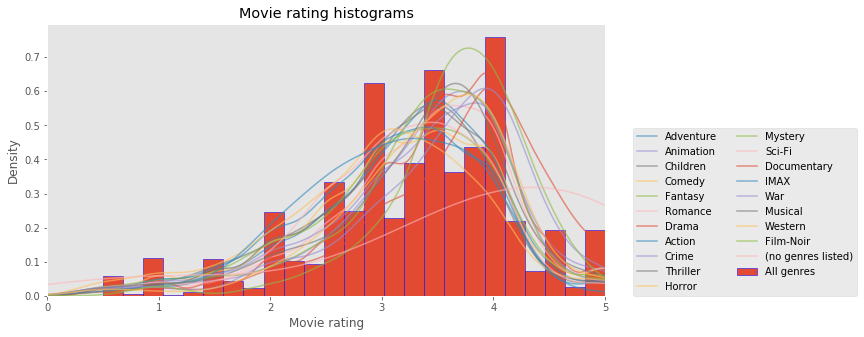

In [86]:
st = default_timer()
dftmp = ratings[['movieId','rating']].groupby('movieId').mean()
# Initialize empty list to capture basic stats
rating_stats = []
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='All genres', figsize=(10,5))
# Plot histograms (kde lines for better visibility) per genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]==True]
    dftmp = ratings[ratings.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=genre)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((genre, avg, std))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

# Housekeeping
%reset_selective -f (^avg$|^dftmp$|^genre$|^std$)

## COMPARISON OF Avg Movie Ratings for each user between dataset from old Grouplens collection and real time tweets collected from IMDB page




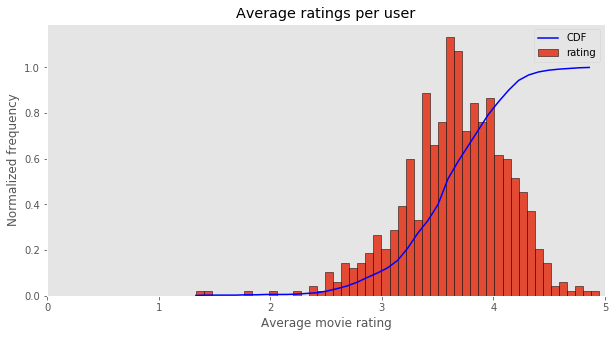

Elapsed time(sec):  0.42


In [87]:
st = default_timer()

dftmp = ratings[['userId','rating']].groupby('userId').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, normed=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^base$|^cumulative$|^values$)

runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))

## Workings to form a graph from IMDB movie ratings collected from real time tweets

In [88]:
tweet_ratings.count()

Tweet_userID       3004
Tweet_movieID      3004
Tweet_rating       3004
Tweet_timestamp    3004
dtype: int64

In [ ]:
user_list=tweet_rating.Tweet_userID.unique()
user_list.size

In [90]:
#filter rows with rating 1 to 10
tweet_ratings=tweet_ratings.loc[tweet_ratings['Tweet_rating'] < 11]

In [92]:
movie_list=tweet_ratings.Tweet_rating.unique()
movie_list.size

11

In [93]:
tweet_ratings.head(10)

,Tweet_userID,Tweet_movieID,Tweet_rating,Tweet_timestamp
0,620953.0,5119116,9.0,1970
1,620953.0,6644200,10.0,1970
2,620953.0,1935897,6.0,1970
3,620953.0,86541,9.0,1970
4,620953.0,1314655,8.0,1970
5,620953.0,83722,7.0,1970
6,2059821.0,1677720,9.0,1970
7,2449651.0,5071412,8.0,1970
8,6131872.0,1677720,7.0,1970
9,7666952.0,5164432,8.0,1970


In [94]:
dftmp = tweet_ratings[['Tweet_rating','Tweet_userID']].groupby('Tweet_rating').count()
dftmp

,Tweet_userID
Tweet_rating,
0.0,2
1.0,35
2.0,23
3.0,42
4.0,68
5.0,233
6.0,324
7.0,637
8.0,745


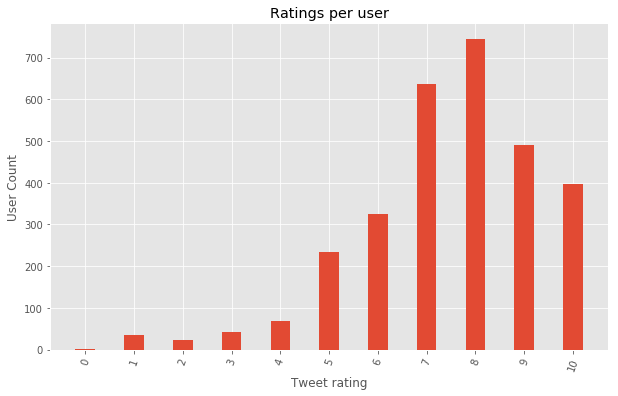

In [96]:
user_rating_count=dict(tweet_ratings['Tweet_userID'].groupby(tweet_ratings['Tweet_rating']).count())

x = np.array(list(user_rating_count.keys()))
y = np.array(list(user_rating_count.values()))

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Tweet rating')
ax.set_ylabel('User Count')

plt.xticks(rotation=70)
plt.xticks(x)
#ax.xaxis_date()
ax.bar(x, y, width=0.4)
plt.title('Ratings per user')


plt.show()

## INSIGHT DRAWN FROM BOTH THE GRAPHS

Users have a positive bias in general, with roughly 95% of their average ratings above the mid-point of 2.5. This is to be expected, and could have many explanations: users actually watch the better movies due to available ratings (and this should get better over time, as the rating system expands); users don't bother that much to rate bad movies as they do with the good ones 

## Database Connection

### Connect to SQLite database

In [127]:
import sqlite3
from sqlite3 import Error
import pandas as pd

## Create Connection

In [165]:
conn = sqlite3.connect('C:\SQLite\gui\SQLiteStudio\movie_review.db')

In [99]:
movies.to_sql('movies', conn, if_exists='replace')
ratings.to_sql('ratings', conn, if_exists='replace')
tag.to_sql('tag', conn, if_exists='replace')
tweet_ratings.to_sql('tweet_ratings', conn, if_exists='replace')
raw_tweets.to_sql('raw_tweets', conn, if_exists='replace')
KimKardashianTweets.to_sql('KimKardashianTweets', conn, if_exists='replace')
AdamSavageTweets.to_sql('AdamSavageTweets', conn, if_exists='replace')
youtube.to_sql('youtube', conn, if_exists='replace')
ratings_hourly.to_sql('ratings_hourly', conn, if_exists='replace')
tweet_ratings_hourly.to_sql('tweet_ratings_hourly', conn, if_exists='replace')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:1362: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [166]:
cur = conn.cursor()

## Sample query to check the connection

In [167]:
cur.execute("select * from tag limit 5;")
results = cur.fetchall()
print(results)

[(0, 18, 4141, 'Mark Waters', 2009), (1, 65, 6874, 'dark hero', 2013), (2, 65, 7013, 'noir thriller', 2013), (3, 65, 7318, 'jesus', 2013), (4, 65, 8529, 'stranded', 2013)]


# Question to be answered

# What is the best time to post?

### For answering this question, I am using ratings dataset from realtime tweets i.e., ratings from IMDB page of twitter

In [145]:
ratings_hourly=pd.read_csv(r'''E:\Data Management and database design\Project One SQL\ratings.csv''')
ratings_hourly.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [149]:
#ratings_hourly.timestamp = datetime.datetime.fromtimestamp(int(ratings_hourly.timestamp))
ratings_hourly['timestamp'] = pd.to_datetime(ratings_hourly['timestamp'],unit='s')
ratings_hourly.timestamp = ratings_hourly.timestamp.dt.hour

In [150]:
ratings_hourly.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [175]:
#ratings_hourly.head(10)
ratings_hourly.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

## By below query, we can say since we get maximum posts at 23rd hour thus 11pm is the best time to post 

In [174]:
pd.read_sql_query("select count(movieId) as maximum_posts,timestamp from ratings_hourly group by timestamp  order by timestamp DESC;", conn)

,maximum_posts,timestamp
0,3598,23
1,6008,22
2,6428,21
3,7011,20
4,5161,19
5,5094,18
6,4717,17
7,4803,16
8,4404,15
9,3723,14


## Applying same question on tag datset where I am getting maximum tags in year 2015,i.e., that was the best year to post

In [112]:
pd.read_sql_query("select count(tag) as maximum_posts,timestamp from tag group by timestamp order by timestamp DESC;", conn)

,maximum_posts,timestamp
0,19924,2015
1,51234,2014
2,61454,2013
3,55375,2012
4,65343,2011
5,57428,2010
6,68981,2009
7,20305,2008
8,31345,2007
9,34130,2006


## Additional questions answered

## What topics are trending in my domain 

In [113]:
pd.read_sql_query("""select tag,count(*) as "most_used" from tag group by movieId having count(*) > 1 order by most_used DESC limit 30;""",conn)


,tag,most_used
0,storytelling,1994
1,Edward Norton,1779
2,complicated,1552
3,alternate reality,1430
4,great ending,1339
5,bittersweet,1240
6,mindfuck,1177
7,cerebral,1168
8,torture,1100
9,too long,995


## Assigning category as poor, good and excellent based on the ratings provided by users

- rating less than 5 is assigned 'POOR'
- rating more than 9 is assigned 'EXCELLENT'
- rating between 5 and 10 is assigned 'good'

In [115]:
pd.read_sql_query("SELECT Tweet_userID, Tweet_movieID, Tweet_rating, CASE  WHEN Tweet_rating < 5.0 THEN 'poor' WHEN Tweet_rating > 9.0 THEN 'excellent' ELSE 'good' END AS RATING_TYPE FROM ( SELECT Tweet_userID, Tweet_movieID, Tweet_rating  FROM tweet_ratings)limit 20;", conn)

,Tweet_userID,Tweet_movieID,Tweet_rating,RATING_TYPE
0,620953.0,5119116,9.0,good
1,620953.0,6644200,10.0,excellent
2,620953.0,1935897,6.0,good
3,620953.0,86541,9.0,good
4,620953.0,1314655,8.0,good
5,620953.0,83722,7.0,good
6,2059821.0,1677720,9.0,good
7,2449651.0,5071412,8.0,good
8,6131872.0,1677720,7.0,good
9,7666952.0,5164432,8.0,good


## Created function to calculate Average rating 

In [116]:
class RatingAvg:
    def __init__(self):
        self.sum = 0
        self.count = 0

    def step(self, value):
        self.sum += value
        self.count += 1

    def finalize(self):
        return self.sum/self.count

conn.create_aggregate("ratingavg", 1, RatingAvg)

In [117]:
cur = conn.cursor()
cur.execute("select RatingAvg(rating) from ratings")
print (cur.fetchone()[0])
# for row in cur:
#     print (row)

3.543608255669773
